In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Note to Future Dan
I should just scrape these summary tables for the data to display in Dashboard... rather than spending
all this time trying to find the best data, cleaning it, and then summarizing it -- these tables are what I want anyway.

Then, just make pretty graphs to tell the stories from these tables -- boom, done!

https://www.iii.org/fact-statistic/facts-statistics-wildfires#Wildfires%20by%20year

In [2]:
# Source: https://data-nifc.opendata.arcgis.com/datasets/nifc::wfigs-wildland-fire-locations-full-history/about

df = pd.read_csv('../Data/WFIGS_-_Wildland_Fire_Locations_Full_History.csv', low_memory=False)
df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
0,-104.457511,45.785037,1,NaN,CERTIFIED,50.64,2020/08/06 23:13:07+00,2020/08/06 23:13:24+00,50.6,20.0,...,0,NaN,NaN,2020/08/06 19:50:29+00,2020/08/12 20:46:01+00,IRWIN,{E5436898-ED0D-4CB1-90C0-D61915FE1F29},NaN,NaN,NaN
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,NaN,NaN
2,-114.835414,48.073946,3,NaN,DEFAULT,NaN,2017/10/18 00:30:00+00,2017/10/18 00:35:00+00,50.0,50.0,...,0,NaN,NaN,2017/10/18 13:46:40+00,2017/11/09 22:08:19+00,IRWIN,{FAC59A92-E6AD-443B-8625-4AAABCF7F533},NaN,NaN,NaN
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2019/07/01 20:10:12+00,2019/07/01 20:10:12+00,IRWIN,{5DF06F41-9948-49D3-B00A-2D3A1D1049C5},NaN,NaN,NaN
4,-121.104180,38.834727,5,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2016/06/20 22:39:02+00,2016/06/20 22:39:02+00,IRWIN,{F378818E-D541-4E0A-9A44-C81886C2B8B4},NaN,NaN,NaN


In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

In [4]:
df.shape

(211460, 96)

In [5]:
# All columns with 100% null values
[col for col in df if df[col].isnull().sum() == df.shape[0]]

['FinalFireReportApprovedByTitle']

### Investigating Columns

In [6]:
df.columns # <-- very similar to IRWIN columns

Index(['X', 'Y', 'OBJECTID', 'ABCDMisc', 'ADSPermissionState',
       'CalculatedAcres', 'ContainmentDateTime', 'ControlDateTime',
       'DailyAcres', 'DiscoveryAcres', 'DispatchCenterID',
       'EstimatedCostToDate', 'FinalFireReportApprovedByTitle',
       'FinalFireReportApprovedByUnit', 'FinalFireReportApprovedDate',
       'FireBehaviorGeneral', 'FireBehaviorGeneral1', 'FireBehaviorGeneral2',
       'FireBehaviorGeneral3', 'FireCause', 'FireCauseGeneral',
       'FireCauseSpecific', 'FireCode', 'FireDepartmentID',
       'FireDiscoveryDateTime', 'FireMgmtComplexity', 'FireOutDateTime',
       'FireStrategyConfinePercent', 'FireStrategyFullSuppPercent',
       'FireStrategyMonitorPercent', 'FireStrategyPointZonePercent',
       'FSJobCode', 'FSOverrideCode', 'GACC', 'ICS209ReportDateTime',
       'ICS209ReportForTimePeriodFrom', 'ICS209ReportForTimePeriodTo',
       'ICS209ReportStatus', 'IncidentManagementOrganization', 'IncidentName',
       'IncidentShortDescription', 'Inciden

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211460 entries, 0 to 211459
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   X                                211460 non-null  float64
 1   Y                                211460 non-null  float64
 2   OBJECTID                         211460 non-null  int64  
 3   ABCDMisc                         10691 non-null   object 
 4   ADSPermissionState               211460 non-null  object 
 5   CalculatedAcres                  4835 non-null    float64
 6   ContainmentDateTime              127245 non-null  object 
 7   ControlDateTime                  116372 non-null  object 
 8   DailyAcres                       144366 non-null  float64
 9   DiscoveryAcres                   151585 non-null  float64
 10  DispatchCenterID                 174080 non-null  object 
 11  EstimatedCostToDate              13186 non-null   float64
 12  Fi

In [8]:
df.filter(regex='[A-Za-z]ate').columns

Index(['ADSPermissionState', 'CalculatedAcres', 'ContainmentDateTime',
       'ControlDateTime', 'EstimatedCostToDate', 'FinalFireReportApprovedDate',
       'FireDiscoveryDateTime', 'FireOutDateTime',
       'FireStrategyConfinePercent', 'FireStrategyFullSuppPercent',
       'FireStrategyMonitorPercent', 'FireStrategyPointZonePercent',
       'ICS209ReportDateTime', 'IncidentTypeCategory',
       'InitialResponseDateTime', 'IsFireCauseInvestigated',
       'POOLandownerCategory', 'POOState', 'CreatedBySystem',
       'StrategicDecisionPublishDate', 'CreatedOnDateTime_dt',
       'ModifiedOnDateTime_dt'],
      dtype='object')

In [9]:
df['FireDiscoveryDateTime'] = df['FireDiscoveryDateTime'].astype('datetime64')

In [10]:
df['FireDiscoveryDateTime'].dtype

dtype('<M8[ns]')

In [11]:
df['FireDiscoveryDate'] = df['FireDiscoveryDateTime'].dt.to_period('M').apply(lambda d: pd.to_datetime(str(d)))
df['FireDiscoveryDate'].head()

0   2020-08-01
1   2020-02-01
2   2017-10-01
3   2019-07-01
4   2016-06-01
Name: FireDiscoveryDate, dtype: datetime64[ns]

In [12]:
df['FireDiscoveryMonth'] = df['FireDiscoveryDate'].dt.month_name()
df['FireDiscoveryMonth'].head()

0      August
1    February
2     October
3        July
4        June
Name: FireDiscoveryMonth, dtype: object

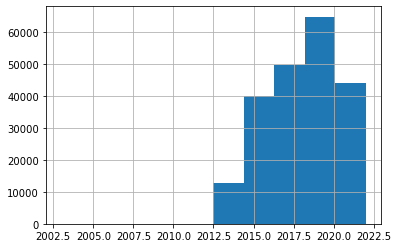

In [36]:
df['FireDiscoveryYear'] = df['FireDiscoveryDate'].dt.year
df['FireDiscoveryYear'].hist();

In [14]:
df['FireDiscoveryYear'].value_counts().sort_values(ascending=False)

2021    39532
2020    35681
2019    29239
2017    25686
2018    23962
2016    20252
2015    19796
2014    12674
2022     4568
2011       20
2009       18
2013       16
2010        7
2012        4
2008        3
2003        1
2004        1
Name: FireDiscoveryYear, dtype: int64

In [15]:
df.filter(regex='[A-Za-z]cres').columns

Index(['CalculatedAcres', 'DailyAcres', 'DiscoveryAcres',
       'InitialResponseAcres'],
      dtype='object')

In [16]:
df['CalculatedAcres'].notnull().sum()

4835

In [17]:
df['DiscoveryAcres'].notnull().sum()

151585

In [18]:
df['DailyAcres'].notnull().sum()

144366

In [22]:
df['DailyAcres'] = df['DailyAcres'].round(decimals=2)

In [35]:
df['EstimatedCostToDate'].notnull().sum() 

13186

In [26]:
[col for col in df if df[col].isnull().sum() >= 0]

['X',
 'Y',
 'OBJECTID',
 'ABCDMisc',
 'ADSPermissionState',
 'CalculatedAcres',
 'ContainmentDateTime',
 'ControlDateTime',
 'DailyAcres',
 'DiscoveryAcres',
 'DispatchCenterID',
 'EstimatedCostToDate',
 'FinalFireReportApprovedByTitle',
 'FinalFireReportApprovedByUnit',
 'FinalFireReportApprovedDate',
 'FireBehaviorGeneral',
 'FireBehaviorGeneral1',
 'FireBehaviorGeneral2',
 'FireBehaviorGeneral3',
 'FireCause',
 'FireCauseGeneral',
 'FireCauseSpecific',
 'FireCode',
 'FireDepartmentID',
 'FireDiscoveryDateTime',
 'FireMgmtComplexity',
 'FireOutDateTime',
 'FireStrategyConfinePercent',
 'FireStrategyFullSuppPercent',
 'FireStrategyMonitorPercent',
 'FireStrategyPointZonePercent',
 'FSJobCode',
 'FSOverrideCode',
 'GACC',
 'ICS209ReportDateTime',
 'ICS209ReportForTimePeriodFrom',
 'ICS209ReportForTimePeriodTo',
 'ICS209ReportStatus',
 'IncidentManagementOrganization',
 'IncidentName',
 'IncidentShortDescription',
 'IncidentTypeCategory',
 'IncidentTypeKind',
 'InitialLatitude',
 'Init

### Cleaning Up Column Types for Important Columns

In [ ]:
df['Calculated Acres'].replace(',', '', regex=True, inplace=True)

In [ ]:
df['Calculated Acres'] = df['Calculated Acres'].astype(float)

In [ ]:
df['Calculated Acres'].isnull().sum()

In [ ]:
df['Daily Acres'].isnull().sum(), df['Discovery Acres'].isnull().sum()

In [ ]:
df['Discovery Acres'].replace(',', '', regex=True, inplace=True)

In [ ]:
df['Daily Acres'].replace(',','', regex=True, inplace=True)

In [ ]:
df['Daily Acres'].isnull().sum(), df['Discovery Acres'].isnull().sum()

In [ ]:
df['Discovery Acres'] = df['Discovery Acres'].astype(float)

In [ ]:
df['Daily Acres'] = df['Daily Acres'].astype(float)

In [ ]:
df.info(verbose=True)

In [ ]:
df['total_acres'] = df['Discovery Acres'] + df['Daily Acres']

In [ ]:
df['total_acres'].isnull().sum()

In [ ]:
df['total_acres'].value_counts()

In [ ]:
df.filter(regex='[A-Z]ate').columns

In [ ]:
df['Created On Date Time'] = df['Created On Date Time'].astype('datetime64')

In [ ]:
df['Created On Date Time']

In [ ]:
df['Created On Date'] = df['Created On Date Time'].dt.to_period('M').apply(lambda d: pd.to_datetime(str(d)))
df['Created On Date']

In [ ]:
df['month_name'] = df['Created On Date'].dt.month_name()
df['month_name']

In [ ]:
df['year'] = df['Created On Date'].dt.year
df['year']

In [ ]:
df['year'].value_counts()

In [ ]:
'----' * 42

In [ ]:
df['Final Fire Report Approved By Title'].value_counts()

In [ ]:
df.isnull().sum()

In [ ]:
df.info(verbose=True)

In [ ]:
df.filter(regex='Acres|acres|Acre|acre').columns

In [ ]:
df['Calculated Acres'].isnull().sum()

In [ ]:
df_acres = df[['Calculated Acres', 'Daily Acres', 'Discovery Acres', 'Final Acres',
       'Initial Response Acres']]

df_acres.isnull().sum()

In [ ]:
df.filter(regex='State|state').columns

In [ ]:
df['POO State'].value_counts()